In [1]:
!pip install -U scikit-learn
!pip install notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix

In [5]:
dataset = pd.read_csv('sample_data/fake_news.csv')
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
dataset.shape

(6335, 4)

In [7]:
list(dataset.columns)

['Unnamed: 0', 'title', 'text', 'label']

In [8]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
dataset.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
x = dataset['text']
y = dataset['label']

# разделение на обучающий и тестовый наборы
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# преобразование текстовых данных в матрицу TF-IDF признаков
tfidf_vectorizer = TfidfVectorizer()
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

# создание и обучение модели Passive Aggressive Classifier
model = PassiveAggressiveClassifier()
model.fit(xtrain_tfidf, ytrain)

# оценка производительности модели
print('Точность: ', model.score(xtest_tfidf, ytest))

# демонстрация работоспособности модели
news_headline = 'US threatens to reimpose sanctions on Venezuelan oil sector'
data = tfidf_vectorizer.transform([news_headline])
print(model.predict(data))

Точность:  0.9392265193370166
['FAKE']


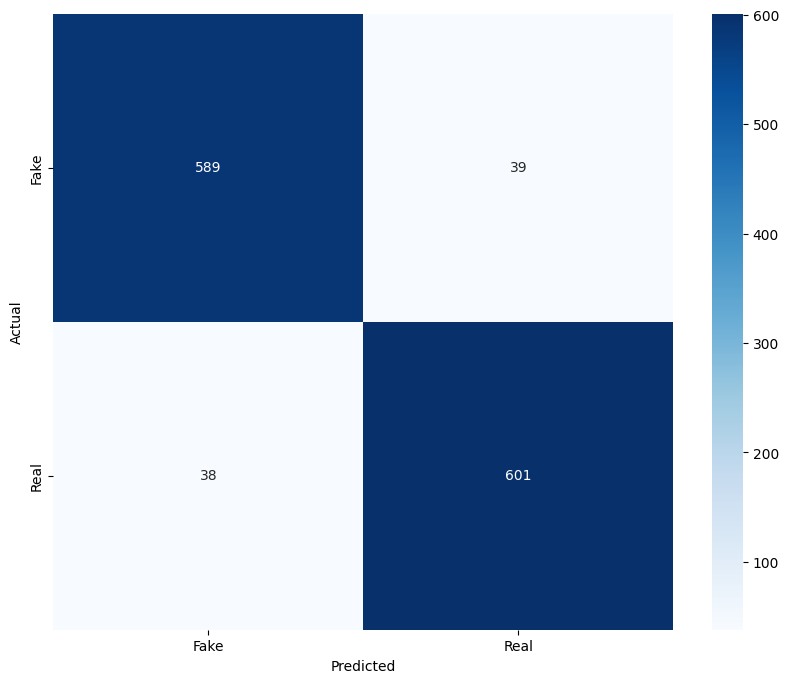

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# получаем предсказания модели на тестовом наборе
pred = model.predict(xtest_tfidf)

# вычисляем матрицу ошибок
conf_matrix = confusion_matrix(ytest, pred)

# визуализируем матрицу ошибок с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

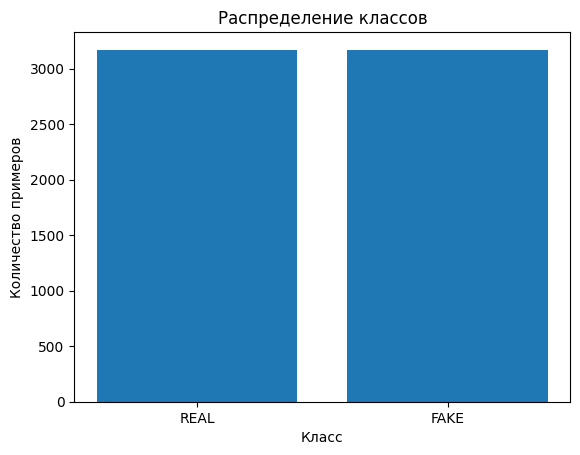

In [17]:
# Подсчет количества примеров каждого класса
counts = dataset['label'].value_counts()

# Построение гистограммы
plt.bar(counts.index, counts.values)
plt.xlabel('Класс')
plt.ylabel('Количество примеров')
plt.title('Распределение классов')
plt.show()

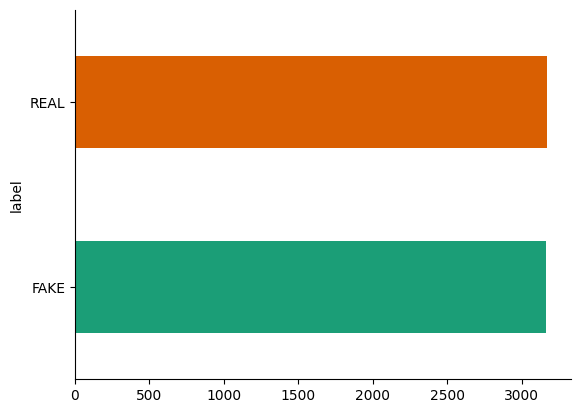

In [27]:
dataset.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)